In [1]:
%pylab inline
img_rows, img_cols = 28, 28

arc = load('mnist.npz')

x_train = arc['arr_0']
y_train = arc['arr_1']
x_test  = arc['arr_2']
y_test  = arc['arr_3']

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

Populating the interactive namespace from numpy and matplotlib
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


8

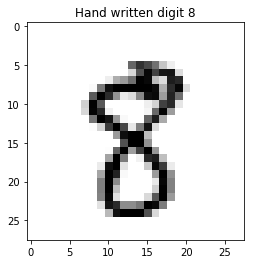

In [8]:
N=46
imshow(x_train[N], cmap='gray_r')
_ = title('Hand written digit '+str(y_train[N]))
y_train[N]

In [9]:
## ASSIGNMENT 1

## define matrix of absolute elements
def _absM(a,b):
    return abs(a-b)

## define d_infty
def _Dinfty(a,b):
    return _absM(a,b).max()

## define d_one
def _D1(a,b):
    return _absM(a,b).sum()

## define d_two
def _D2(a,b):
    return sqrt(square(_absM(a,b)).sum())

In [10]:
#_Dinfty(x_train[0],x_train[3])
_D1(x_train[0],x_train[3])
#_D2(x_train[0],x_train[3])

122.61177

In [267]:
## ASSIGNMENT 2

def my_func(N,dist):
    X=x_train[:N]
    ret = zeros((N,N))
    for i in range(N):
        ret[i]=[ dist(X[i],B) for B in X ]
    return ret+ret.T

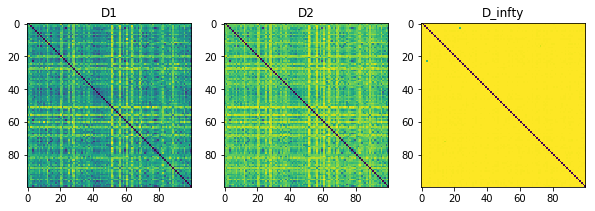

In [268]:
## ASSIGNMENT 3

import matplotlib.pyplot as plt

methods = [_D1,_D2,_Dinfty]
names = {_D1:'D1',_D2:'D2',_Dinfty:'D_infty'}
fig, axs = plt.subplots(1,3,figsize=(10,6))
for ax, method in zip(axs, methods):
    ax.imshow(my_func(100,method),cmap='viridis')
    ax.set_title(names[method].capitalize())

In [239]:
## ASSIGNMENT 4
## precompute heavy part of the computation

N = 1600
M1 = my_func(N,_D1)
M2 = my_func(N,_D2)
M3 = my_func(N,_Dinfty)

In [278]:
methods = [M1,M2,M3]
errors = []
for num in [100,200,400,800,1600]:
    loc_errors=[]
    for matrix in methods:
        error_counter = 0.
        for i in range(num):
            M = matrix[i:i+1][0][:num]
            MM = delete(M,i)
            digit = y_train[argmin(MM)]
            if y_train[i] != digit:
                error_counter +=1
        loc_errors.append(error_counter/num)
    errors.append(loc_errors)
    
from pprint import pprint    
pprint(errors)

[[0.61, 0.62, 0.72],
 [0.565, 0.565, 0.67],
 [0.5725, 0.57, 0.61],
 [0.53, 0.53125, 0.595],
 [0.495, 0.49125, 0.579375]]


In [279]:
## define the classify function for later usage
X = x_train[:100]
def classify(z,dist):
    all_distances = [dist(z,x) for x in X]
    digit = y_train[argmin(all_distances)]
    return digit